# Pymaceuticals Inc.
---

### Analysis

This analysis looks over the a drug study using mice. The study contains 248 mice; 123 female, and 125 male, after removing a duplicate. In the summary statistics section summarizes the mean, median, variance, standard deviation, and standard error of all the drug regimens used within the study. 
Two bar graphs were utilized to showcase the number of observed mouse timepoints per drug regimen. They showed that Capomulin has been used on the highest number of mice, while Zoniferol has the lowest number of usage on mice. Two pie graphs were created to showcase the distribution of female and male mice used within the study. It's divided nearly equal, male being at 51% and females at 49%. 
There is a strong positive correlation at 0.84 between mouse weight, and the average tumor volume. This suggests that as the weight of a mouse increases so does the average volume of the tumor. Looking at this data, it appears that the drug regimens of Capomulin and Ramicane are the most effective in reducing the size of tumors within the mice
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='right')

# Display the data table for preview
print(combined_study_df.shape)
combined_study_df.head()

(1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mouse_count = len(combined_study_df.groupby('Mouse ID').count())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_ids = combined_study_df.loc[combined_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicated_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated = combined_study_df.loc[combined_study_df["Mouse ID"] == "g989", :]
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df = combined_study_df[combined_study_df['Mouse ID'].isin(duplicated_ids)==False]
print(clean_study_df.shape)
clean_study_df.head()

(1880, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(combined_study_df.groupby('Mouse ID').count())
clean_mouse_count 

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_study_df['Tumor Volume (mm3)'].groupby(clean_study_df['Drug Regimen']).mean()
median = clean_study_df['Tumor Volume (mm3)'].groupby(clean_study_df['Drug Regimen']).median()
variance = clean_study_df['Tumor Volume (mm3)'].groupby(clean_study_df['Drug Regimen']).var()
std_dev = clean_study_df['Tumor Volume (mm3)'].groupby(clean_study_df['Drug Regimen']).std()
sem = clean_study_df['Tumor Volume (mm3)'].groupby(clean_study_df['Drug Regimen']).sem()
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                           "Median Tumor Volume":median,
                           "Tumor Volume Variance":variance,
                           "Tumor Volume Std. Dev.":std_dev,
                           "Tumor Volume Std. Err.":sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_study_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
#Gather total number of rows for (Mouse ID/Timepoints for each drug regimen)
mouse_timepoints = clean_study_df["Drug Regimen"].value_counts()
mouse_timepoints

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

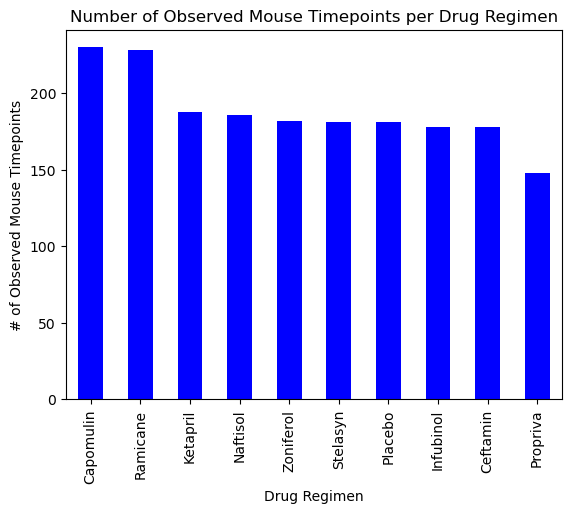

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_pandas = mouse_timepoints.plot.bar(color='b')

plt.title("Number of Observed Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

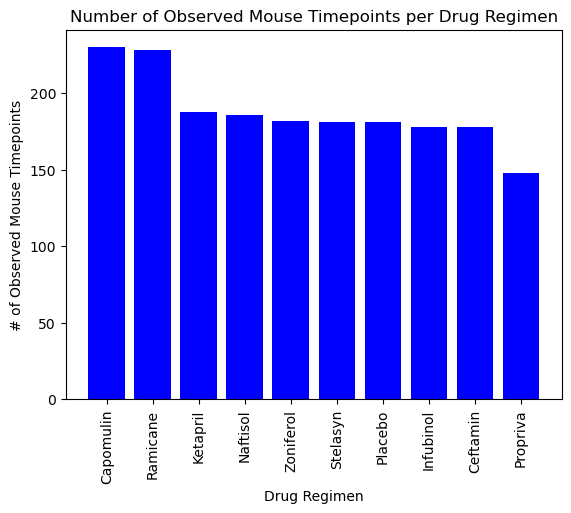

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_timepoints.index.values
y_axis = mouse_timepoints.values

plt.bar(x_axis,y_axis, color='b', alpha=1, align='center')
plt.xticks(rotation='vertical')
plt.title("Number of Observed Mouse Timepoints per Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

In [12]:
#number of male and female mice
gender_dis = clean_study_df.groupby("Mouse ID").max()["Sex"].value_counts()
gender_dis

Male      125
Female    123
Name: Sex, dtype: int64

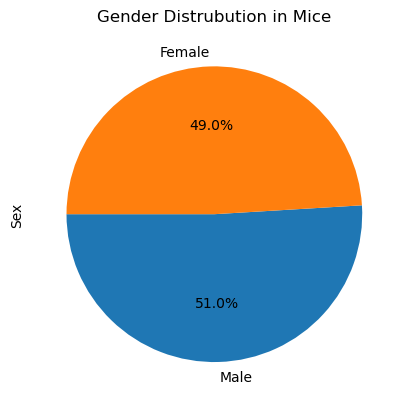

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dis = clean_study_df["Sex"].value_counts()
plt.title("Gender Distrubution in Mice")
gender_dis.plot(kind="pie", y='', autopct="%1.1f%%", startangle=180, shadow=False, explode=(0,0))
plt.show()

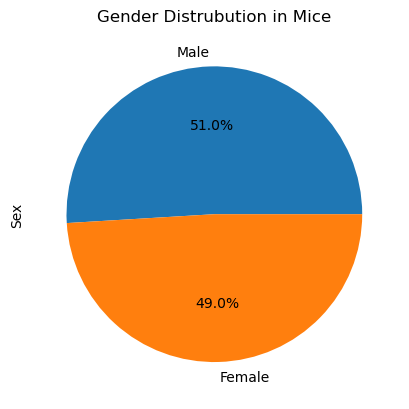

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [123,125]
plt.title("Gender Distrubution in Mice")
plt.ylabel('Sex')
plot = gender_dis.plot.pie(y='', autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_study_df.groupby(["Mouse ID"]) ["Drug Regimen", "Timepoint"].max().reset_index()

capomulin_df = clean_study_df.loc[clean_study_df["Drug Regimen"] == "Capomulin",:]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_time_df = last_timepoint.merge(clean_study_df,on=['Mouse ID','Drug Regimen','Timepoint'], how='left')
max_time_df.head()


/var/folders/wg/g2wgk99x2l76360wx5d0fqb80000gn/T/ipykernel_13590/861877307.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  last_timepoint = clean_study_df.groupby(["Mouse ID"]) ["Drug Regimen", "Timepoint"].max().reset_index()


,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a262,Placebo,45,Female,17,29,70.717621,4
3,a275,Ceftamin,45,Female,20,28,62.999356,3
4,a366,Stelasyn,30,Female,16,29,63.440686,1


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = []
    
for drug in regimens:
    current_drug_s = max_time_df['Drug Regimen']== drug
   
    current_drug_tumor_volumes_s = max_time_df.loc[current_drug_s, 'Tumor Volume (mm3)'] 
    tumor_vol_data.append(current_drug_tumor_volumes_s)

    quartiles = current_drug_tumor_volumes_s.quantile([0.25,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)  
    
    outlier_upper_s = current_drug_tumor_volumes_s > upper_bound
    outlier_lower_s = current_drug_tumor_volumes_s < lower_bound
    
    outlier_values_s = current_drug_tumor_volumes_s[outlier_upper_s | outlier_lower_s]
    
    print(f"Outliers for {drug} are {outlier_values_s}.")


Outliers for Capomulin are Series([], Name: Tumor Volume (mm3), dtype: float64).
Outliers for Ramicane are Series([], Name: Tumor Volume (mm3), dtype: float64).
Outliers for Infubinol are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Outliers for Ceftamin are Series([], Name: Tumor Volume (mm3), dtype: float64).


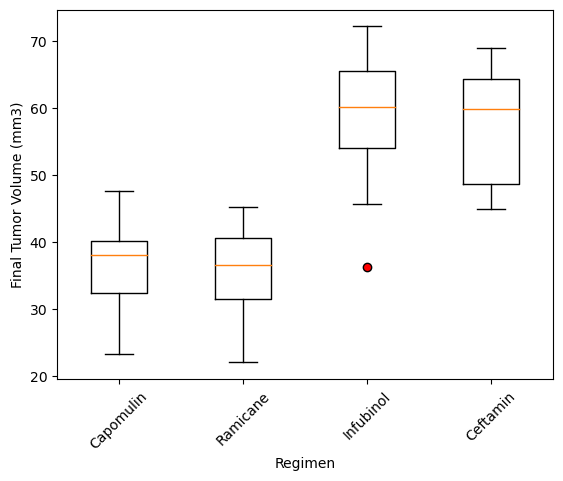

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig = plt.figure()
plt.title("")
plt.xlabel("Regimen")
plt.xticks(rotation=45)
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(tumor_vol_data, labels=regimens, flierprops={'markerfacecolor': 'r'})
plt.show()

## Line and Scatter Plots

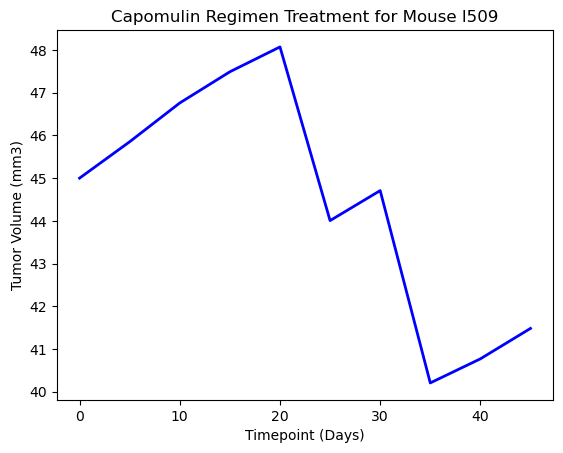

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
x_axis = line_df["Timepoint"]
tum_vol = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Capomulin Regimen Treatment for Mouse l509")
plt.plot(x_axis, tum_vol, linewidth=2, color='b')
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

/var/folders/wg/g2wgk99x2l76360wx5d0fqb80000gn/T/ipykernel_13590/4266418202.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap_avg_vol = capomulin_df.groupby(['Mouse ID']).mean()


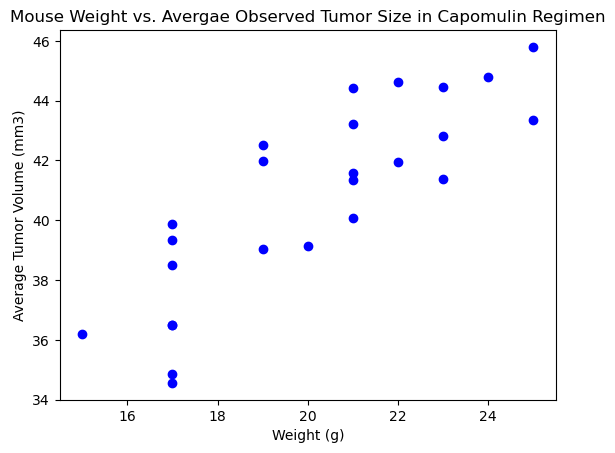

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
cap_avg_vol = capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(cap_avg_vol['Weight (g)'],cap_avg_vol['Tumor Volume (mm3)'], color='b')
plt.title("Mouse Weight vs. Avergae Observed Tumor Size in Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse with and the average tumor volume is 0.84.


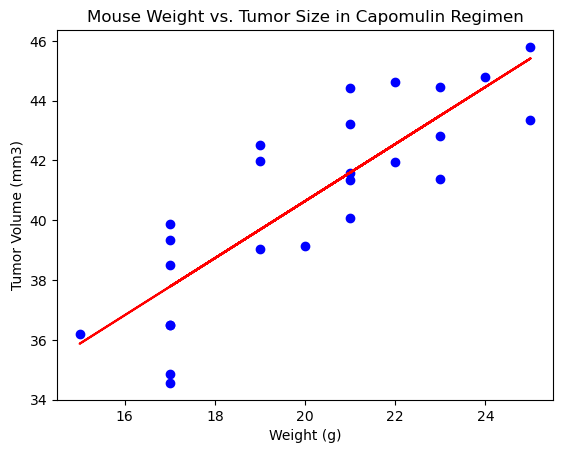

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(cap_avg_vol['Weight (g)'],cap_avg_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse with and the average tumor volume is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_avg_vol["Weight (g)"], cap_avg_vol["Tumor Volume (mm3)"])
regress_values = cap_avg_vol["Weight (g)"] * slope + intercept

plt.title("Mouse Weight vs. Tumor Size in Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")                      
plt.scatter(cap_avg_vol["Weight (g)"], cap_avg_vol["Tumor Volume (mm3)"], color='b')
plt.plot(cap_avg_vol["Weight (g)"], regress_values, color='r')

plt.show()